# Homework 1 solutions

I'm using SymPy -- the symbolic math library for python -- to do the algebra here.  The next 2 cells load SymPy for interactive work and define the variables we are going to use (and treat as math symbols)

In [1]:
from sympy import init_session
init_session(use_latex="mathjax")
%matplotlib inline

IPython console for SymPy 1.11.1 (Python 3.11.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



## 1. stellar model

In [2]:
rho = symbols('rho', cls=Function)
rhoc = symbols('rho_c')
qc = symbols('q_c')
Pc = symbols('P_c')
G = symbols('G')
Mstar, Rstar = symbols('M_\star R_\star')
r = symbols('r')
xi = symbols('xi')
mu = symbols('mu')
k = symbols('k')
m_u = symbols('m_u')

Imagine a star has a density profile of the form:

$$\rho(r) = \rho_c \left [ 1 - \left (\frac{r}{R_\star} \right )^3 \right ]$$

where $\rho_c$ is the central density.


### a. 

Find an expression for the central density in terms of
     $R_\star$ and $M_\star$ (you need to use the mass equation).


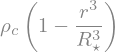

In [3]:
rho = rhoc * (1 - (r/Rstar)**3)
rho

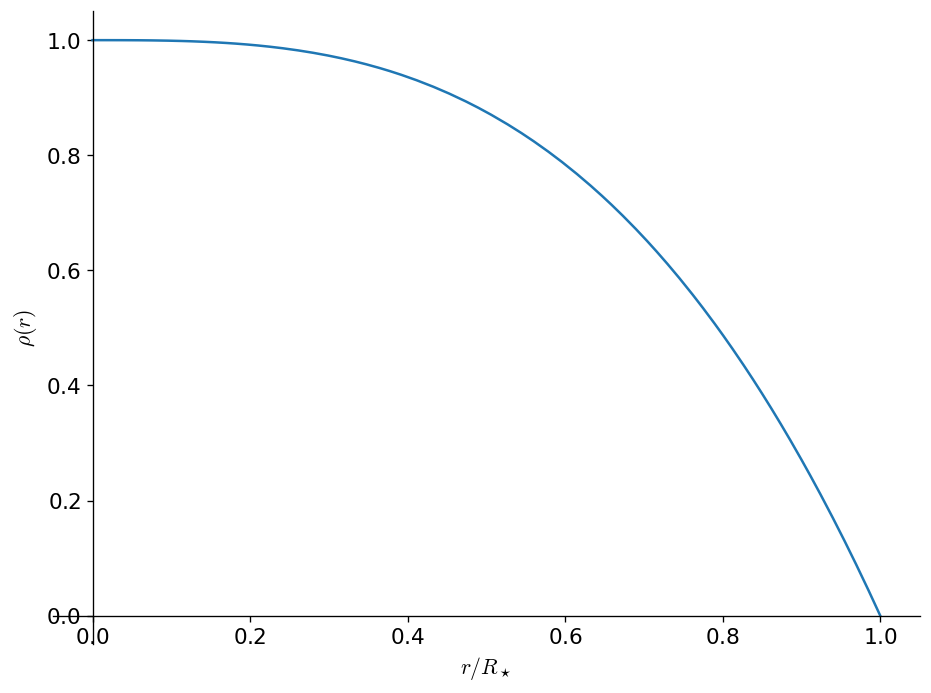

In [4]:
# to plot it, we need to make it dimensionless
z = (rho/rhoc).subs(r, xi*Rstar)
plot(z, (xi, 0, 1), xlabel=r"$r/R_\star$", ylabel=r"$\rho(r)$")

Now we get the mass by integrating $dM/dr = 4\pi r^2 \rho(r)$:

\begin{equation}
M_\star = \int_0^{R_\star} 4\pi r^2 \rho(r) dr
\end{equation}

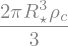

In [5]:
M = integrate(4*pi*r**2*rho, (r, 0, Rstar))
M

This is $M_\star$, so we can solve for $\rho_c$

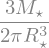

In [6]:
rc = solve(Eq(M, Mstar), rhoc)[0]
rc

This shows us that

$$\rho_c = \frac{3 M_\star}{2\pi R_\star^3}$$ 

Now we will symbolically replace $\rho_c$ in the density expression with this result for the future calculations

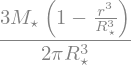

In [7]:
rho = rho.subs(rhoc, rc)
rho

### b.

Use HSE and the fact that the pressure vanishes at the surface
    to find the pressure as a function of
    radius.  Your answer will be in the form of $P(r) = P_c \times$
    (polynomial in $r/R_\star$).  
    
What is $P_c$ in terms of $M_\star$ and $R_\star$?  
    
Express $P_c$ numerically with $M_\star$ and $R_\star$ in solar units.

We need to integrate HSE, 

$$dP/dr = -(GM(r)/r^2)\rho$$

so we need a general expression for $M(r)$

First we define 

$$M(r) = \int_0^r 4\pi r^2 \rho(r) dx$$

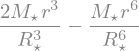

In [8]:
M = integrate(4*pi*r**2*rho, (r, 0, r))
M

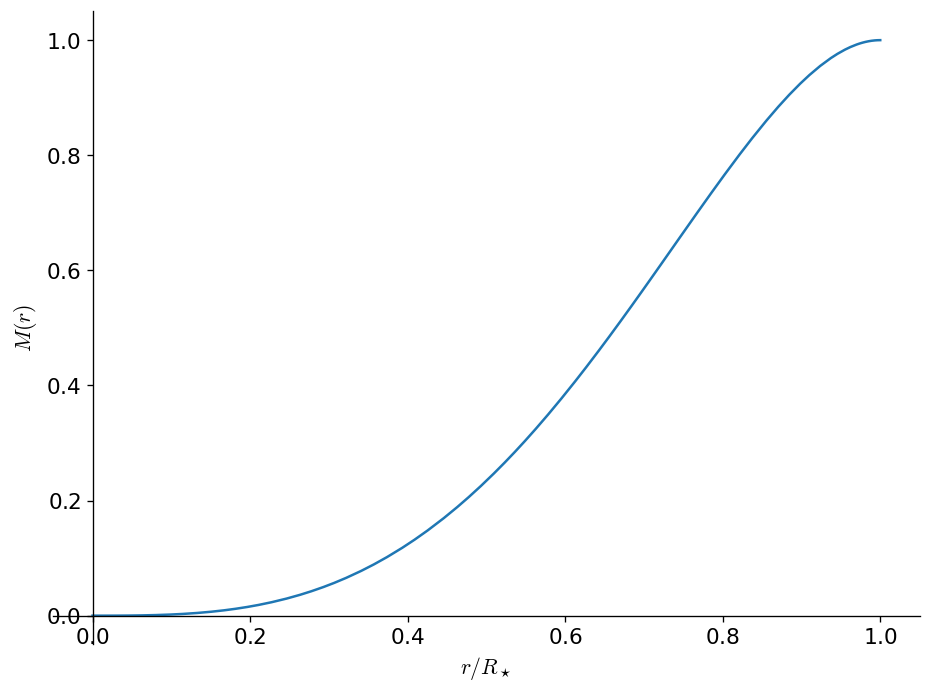

In [9]:
z = simplify((M/Mstar).subs(r, xi*Rstar))
plot(z, (xi, 0, 1), xlabel=r"$r/R_\star$", ylabel=r"$M(r)$")

Now we can integrate HSE.  We will do this as

$$P = P_c + \int_0^{R_\star} \frac{-GM(r)}{r^2} \rho dr$$

We'll substitute in our expressions for $M(r)$ and $\rho(r)$ in the integrand.

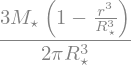

In [10]:
rho

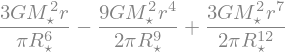

In [11]:
expand(G*M/r**2*rho)

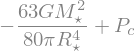

In [12]:
P = Pc + integrate(-G*M/r**2*rho, (r, 0, Rstar))
P

This was the integral to the surface, so this result is the surface pressure, but we know that $P(R_\star) = 0$, 
so we can enforce that here to find $p_c$

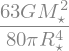

In [13]:
Pc = solve(Eq(P, 0), Pc)[0]
Pc

For our general pressure expression. we integrate to some shell $r$

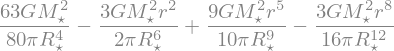

In [14]:
P = Pc + integrate(-G*M/r**2*rho, (r, 0, r))
P

Or factoring $P_c$ out (i.e. $P/P_c$), we have

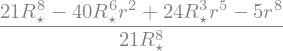

In [15]:
simplify(P/Pc)

This shows that we can write:
\begin{equation}
P(r) = P_c \left [1 - \frac{40}{21} \left (\frac{r}{R_\star}\right )^2
                    + \frac{8}{7} \left (\frac{r}{R_\star}\right )^3 
                    - \frac{5}{21} \left ( \frac{r}{R_\star}\right )^8 \right ]
\end{equation}

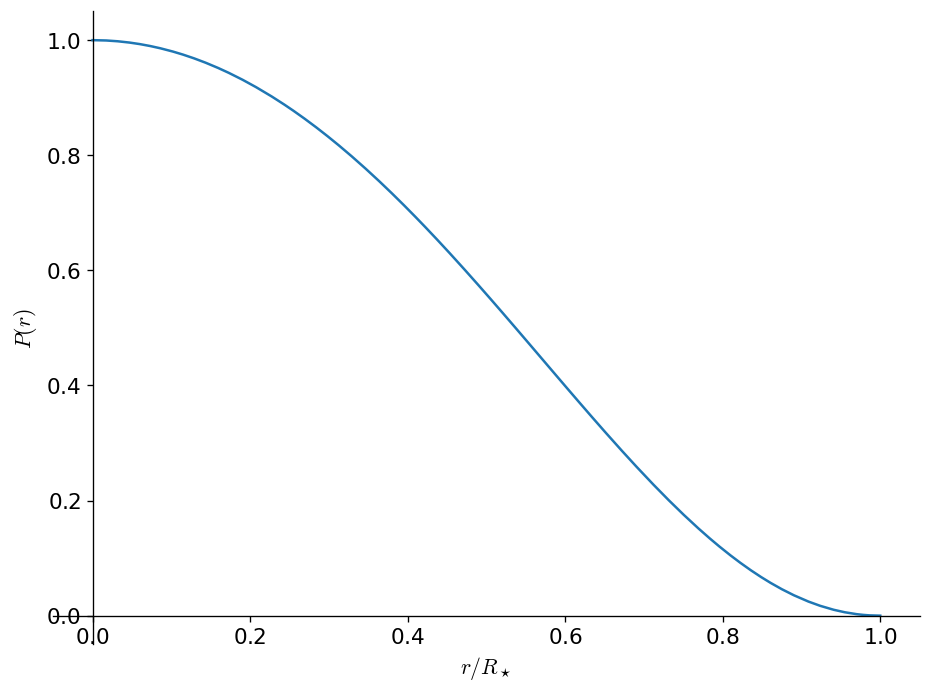

In [16]:
z = simplify((P/Pc).subs(r, xi*Rstar))
plot(z, (xi, 0, 1), xlabel=r"$r/R_\star$", ylabel=r"$P(r)$")

### c.

In this model, what is the central temperature, $T_\star$?
(Assume an ideal gas).  Compare to the result from the
    constant-density model (we did this in class).  Why is the central
    pressure higher for the linear model whereas the central
    temperature is lower?

The central temperature, assuming the ideal gas law, is:

$$T_c = \frac{\mu m_u P}{\rho k}$$

let's start by evaluating the central pressure in the Sun for this model

In [17]:
central_P = Pc.subs(G, 6.67e-8).subs(Mstar, 2.e33).subs(Rstar, 7.e10).evalf()
print("central pressure = ", central_P)

central_rho = rc.subs(Mstar, 2.e33).subs(Rstar, 7.e10).evalf()
print("central density = ", central_rho)

central pressure =  2.78544350839839e+15
central density =  2.78405148265706


We need to know the composition, so we'll look at two choices here:

i. pure H composition has $\mu = 1/2$

In [18]:
mu = 0.5
m_u = 1.67e-24
k = 1.38e-16

T = mu*m_u*central_P/(central_rho*k)
print(T)

6053750.00000000


ii. pure He composition has $\mu = 4/3$

In [19]:
mu = 4./3.
T = mu*m_u*central_P/(central_rho*k)
print(T)

16143333.3333333


In class, we did a constant density model.  We found that the central pressure was
\begin{equation}
P_c = \frac{3}{8\pi} \frac{GM_\star^2}{R_\star^4}
\end{equation}
Here, with the cubic density profile, we find 
\begin{equation}
P_c = \frac{63}{80\pi} \frac{G M_\star^{2}}{R_\star^{4}}
\end{equation}
The pressure is greater in this model because more mass is concentrated toward the center of the star, increasing the force of gravity throughout, making the outer layers weigh more.

The temperature is the _almost the same_ in both models, since both the central pressure and central density increase by the here.

Let's evaluate $P_c/\rho_c$ for our model


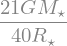

In [20]:
Pc/rc


This shows us that the central temperature is:

$$T_c = \frac{21}{40} \frac{G M_\star}{R_\star} \frac{\mu m_u}{k}$$

while for the constant density model, the coefficient was 1/2

### d.
Verify that the virial theorem is satisfied and write down an
    explicit expression for $\Omega$ (i.e. what is the `$\alpha$'
    coefficient)?


We want to demonstrate that

$$-3 \int_0^{M_\star} \frac{p}{\rho} dM = \Omega$$

### gravitational potential energy

We start by integrating

$$\Omega = \int_0^{M_\star} \frac{GM(r)}{r} dm = \int_0^{R_\star} \frac{G M(r)}{r} 4\pi r^2 \rho dr$$

To do this, we use our expression for $M(r)$ and $\rho(r)$

In [21]:
Omega = symbols("Omega")
Omega = integrate(-G*M*4*pi*r*rho, (r, 0, Rstar))

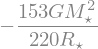

In [22]:
Omega

So this shows that $\alpha = 153/220$.

### internal energy

We need to compute:

$-3 \int_0^{M_\star} \frac{p}{\rho} dM = -3 \int_0^{R_\star} 4 \pi r^2 P dr$

and we can use our expression for $P(r)$

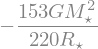

In [23]:
-3*integrate(4*pi*r**2*P, (r, 0, Rstar))

We see that these two integrals give the same result, verifying that the Virial theorem holds.

### e.
Assume that the nuclear energy production rate is given as:

$$
q(r) = \begin{cases}
        q_0 \left ( 1 - \frac{r}{0.2 R_\star} \right ) & r \le 0.2 R_\star \\
        0 & r > 0.2 R_\star
      \end{cases}
$$

Calculate the luminosity of the star at its surface in terms of
$R_\star$, $\rho_c$, and $q_0$.

We just need to do the integral:

$$L = \int_0^{M_\star} q dm = \int_0^{R_\star} q(r) 4 \pi r^2 \rho(r) dr$$

(this is the result when we are in thermal equilibrium).

Since $q(r)$ is 0 beyond $R_\star/5$, we only need to integrate up to that point.

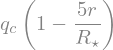

In [24]:
q = qc * (1 - (r/(Rstar/5)))
q

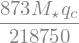

In [25]:
integrate(4*pi*r**2*q*rho, (r, 0, Rstar/5))

Notice that the result is $\propto M_\star q_c$ and has units of luminosity

## 2. Central pressure

We want to integrate

$$\frac{dP}{dM} = -\frac{GM}{4\pi r^4}$$

from the center outward:

$$\int_0^{M_\star} dP = - \int_0^{M_\star} \frac{GM}{4\pi r^4} dM$$

integrating, we have:

$$P(M_\star) - P(0) = - \int_0^{M_\star} \frac{GM}{4\pi r^4}dM$$

now the surface pressure, $P(M_\star)$ vanishes, leaving:

$$P_c = \int_0^{M_\star} \frac{GM}{4\pi r^4}dM$$

Next, we substitute $r = R_\star$ into the integrand, giving:

$$P_c > \int_0^{M_\star} \frac{GM}{4\pi R_\star^4}dM = \frac{GM_\star^2}{8\pi R_\star^4}$$

We note that this is a lower bound, since $r < R_\star$ everywhere in the integrand, and $r$ appears in the denominator.

## 3. Blackbody Radiation

### a. Wien's law

We start with

$$I = \frac{2 h c^2 / \lambda^5}{e^{hc/\lambda k T} - 1}$$

and make the substitution $x = \lambda k T/ hc$ (many of you pointed out that the inverse would be easier).

This gives:

$$I = 2 h c^2 \left (\frac{kT}{hc} \right )^5 \frac{x^{-5}}{e^{1/x} - 1}$$

Let's write a function to give the dimensionless part of this

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def I(x):
    return x**-5 / (np.exp(1/x) - 1)

Now let's plot it, to get a sense of that it looks like:

/tmp/ipykernel_1061886/2254914631.py:2: RuntimeWarning: divide by zero encountered in power
  return x**-5 / (np.exp(1/x) - 1)
/tmp/ipykernel_1061886/2254914631.py:2: RuntimeWarning: divide by zero encountered in divide
  return x**-5 / (np.exp(1/x) - 1)
/tmp/ipykernel_1061886/2254914631.py:2: RuntimeWarning: invalid value encountered in divide
  return x**-5 / (np.exp(1/x) - 1)


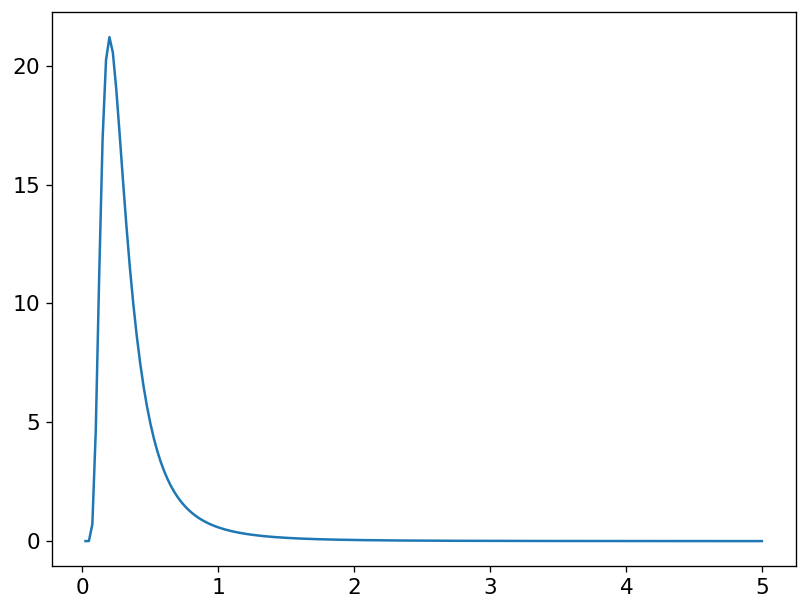

In [28]:
fig, ax = plt.subplots()
xs = np.linspace(0, 5, 200)
ax.plot(xs, I(xs))

Now we differentiate $I(x)$ and set it equal to zero, giving:

$$\frac{x^{-5}}{e^{1/x} - 1} \left ( -\frac{5}{x} + \frac{1}{e^{1/x} - 1} \frac{e^{1/x}}{x^2} \right )$$

We can use any root finding method, like SciPy's Brent's method, to find the root.  From the plot above, we expect it to be between $[0, 1]$, but also, $x=0$ will do bad things, so we'll start our root search a bit away from that.

In [29]:
def Iprime(x):
    return x**-5 / (np.exp(1/x) - 1) * (-5/x + 1/(np.exp(1/x) - 1) * np.exp(1/x) / x**2)

In [30]:
from scipy import optimize

In [31]:
r = optimize.brentq(Iprime, 0.01, 1)

In [32]:
r

So the root is $x = 0.201$ or $1/x = 4.965$.

Now we add back in the units:

$$\lambda T = \frac{hc}{k} x$$

In [33]:
k = 1.38e-16  # erg /K
c = 3e10  # cm/s
h = 6.63e-27  # erg s

In [34]:
print(h*c/k * r)

0.29028624127339525


This shows that 

$$\lambda T = 0.29 ~\mathrm{cm~K}$$

### b.

Now we want to estimate the Earth's temperature.

At the Earth, the solar flux is:

$$f = \frac{L_\odot}{4 \pi d^2}$$

where $d = 1~\mathrm{AU}$ is the Earth-Sun distance.

The Earth presents a circular cross section, so the power absorbed by the Earth is:

$$P_\mathrm{abs} = \epsilon \pi R_\oplus^2 f$$

where $\epsilon$ is the efficiency (so $1-\epsilon$ is the albedo).

Now, we assume that the Earth emits over its entire surface as a blackbody, so its emission is:

$$P_\mathrm{emit} = 4 \pi R_\oplus \sigma T_\oplus^4$$

As a blackbody, emission equals absorption, so:

$$4\pi R_\oplus \sigma T_\oplus^4 = \epsilon \pi R_\oplus^2 f$$

or 

$$T_\odot = \left ( \frac{\epsilon f}{4\sigma} \right )^{1/4}$$

Let's put in numbers:

In [35]:
d = 1.5e13  # cm
sigma = 5.67e-5  # erg / s / cm^2 / K^4
L_sun = 3.9e33  # erg / s
eps = 0.6

In [36]:
f = L_sun / (4 * np.pi * d**2)
T_earth = (eps * f / (4 * sigma))**0.25
T_earth

This is cold.  The blackbody temperature of Earth is below freezing.  But we neglected the atmosphere and the greenhouse effect that raises the Earth's surface temperature to above the freezing point.